In [110]:
import pandas as pd
import numpy as np
from random import randrange
import numpy as np
from numpy.random import random_integers as rnd
import matplotlib.pyplot as plt

In [111]:
def maze(width=80, height=40, complexity=.75, density =.75):
    # Only odd shapes
    shape = ((height//2)*2+1, (width//2)*2+1)
    # Adjust complexity and density relative to maze size
    complexity = int(complexity*(5*(shape[0]+shape[1])))
    density    = int(density*(shape[0]//2*shape[1]//2))
    # Build actual maze
    Z = np.zeros(shape)
    # Fill borders
    Z[0,:] = Z[-1,:] = 1
    Z[:,0] = Z[:,-1] = 1
    # Make isles
    for i in range(density):
        x, y = rnd(0,shape[1]//2)*2, rnd(0,shape[0]//2)*2
        Z[y,x] = 1
        for j in range(complexity):
            neighbours = []
            if x > 1:           neighbours.append( (y,x-2) )
            if x < shape[1]-2:  neighbours.append( (y,x+2) )
            if y > 1:           neighbours.append( (y-2,x) )
            if y < shape[0]-2:  neighbours.append( (y+2,x) )
            if len(neighbours):
                y_,x_ = neighbours[rnd(0,len(neighbours)-1)]
                if Z[y_,x_] == 0:
                    Z[y_,x_] = 1
                    Z[y_+(y-y_)//2, x_+(x-x_)//2] = 1
                    x, y = x_, y_
    return Z

In [112]:
def create_mz(width = 80, height = 40):
    mz = maze(width, height)
    for i in range(100):
        x = randrange(mz.shape[1]-1) #start 2
        y = randrange(mz.shape[1]-1) #end 3
        if (x!=0 & x!=(randrange(mz.shape[1]-1)) & y!=0 & y!=(randrange(mz.shape[1]-1)) &(mz[1][y]!=1) & (mz[mz.shape[0]-2][x]!=1)):
            mz[mz.shape[0]-1][x] = 2
            mz[0][y] = 3
            break
    start = (mz.shape[0]-1,x)
    end = (0, y)
    return(mz, start, end)

In [113]:
def moving(mz, seq, current_pos):
    for i in seq:
        if ((i == 'n') & (current_pos[0]!=0)):
            if((mz[current_pos[0]-1, current_pos[1]]!=1)):
                current_pos = (current_pos[0]-1, current_pos[1])
        if ((i == 's') & (current_pos[0]!=(mz.shape[0]-1))):
            if((mz[current_pos[0] + 1, current_pos[1]]!=1)):
                current_pos = (current_pos[0]+1, current_pos[1])
        if ((i == 'w') & (mz[(current_pos[0], current_pos[1]-1)]!=1)):
            current_pos = (current_pos[0], current_pos[1]-1)
        if ((i == 'e') & (mz[(current_pos[0], current_pos[1]+1)]!=1)):
            current_pos = (current_pos[0], current_pos[1]+1)
    return(current_pos)

In [114]:
def display_current_pos(mz, current_pos, figsize=(6,4), cmap = plt.cm.binary):
    mz2 = mz.copy()
    mz2[current_pos] = 4
    plt.figure(figsize=figsize)
    plt.imshow(mz2,interpolation='nearest', cmap=cmap)
    plt.xticks([]),plt.yticks([])
    plt.show()

In [115]:
def display_action_sequence(mz, seq, current_pos, figsize = (6,4), cmap = plt.cm.binary):
    mz2 = mz.copy()
    for i in seq:
        current_pos = moving(mz, i, current_pos)
        mz2[current_pos] = 4
    plt.figure(figsize=figsize)
    plt.imshow(mz2,interpolation='nearest', cmap=cmap) #plt.cm.binary
    plt.xticks([]),plt.yticks([])
    plt.show()

# Reinforcement Learning

In [128]:
def training(nEpisodes, overEpisodes, epochesCount, epsilon, alpha, gamma, method):
    for i in np.arange(0,nEpisodes):
        if(i%(nEpisodes*0.10)==0):
            #epsilon = epsilon*0.8
            print("Episodio #",i, "\n Q[start]:", Q[start], "\n Q[(start[0] - 1, start[1])]: ", Q[(start[0] - 1, start[1])],"\n epochesCount: ", epochesCount )

        s = s_initial = start # initial state
        stop = False
        while not stop:  
            # epsilon-greedy policy
            p = np.random.uniform()
            if p < epsilon:
                a = np.random.choice(actions) # random action
            else:
                a = actions[np.argmax(Q[s])]  # greedy action based on history information
            s_ = moving(mz, seq=a, current_pos=s)    #mapAction(a) # translate string action to numeric action
            r = gridWorld[s_]
            overEpisodes[i] += r # counter reward accumulated in each episode
            epochesCount[i] += 1 # counter of epoch in episode
            ix = actions.index(a)
            if (method=='Q_l'):
                Q[s][ix] = Q[s][ix] + alpha * (r - 0.1 + gamma * np.max(Q[s_]) - Q[s][ix]) 

            if(method == 'Sarsa'):
                p = np.random.uniform()
                if p < epsilon:
                    a_ = np.random.choice(actions)
                else:
                    a_ = actions[np.argmax(Q[s_])]
                ix_ = actions.index(a_)
                Q[s][ix] = Q[s][ix] + alpha * ( r - 0.1 + gamma * Q[s_][ix_] - Q[s][ix])

            s = s_
            if not r == 0:
                stop = True

In [123]:
#display_current_pos(mz, start, figsize=(15,10))

In [124]:
actions = ["n","s","e","w"] #north, south, east, west

In [125]:
mz, start, end = create_mz(width=200,height=200)
gridWorld = mz.copy()
gridWorld[gridWorld == 1] = float('nan')
#gridWorld[gridWorld == 0] = 2 #optimistic initial values
gridWorld[gridWorld == 2] = 0
gridWorld[gridWorld == 3] = 10

C:\Users\giorgio1\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: This function is deprecated. Please call randint(0, 100 + 1) instead
  
C:\Users\giorgio1\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: This function is deprecated. Please call randint(0, 3 + 1) instead
C:\Users\giorgio1\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: This function is deprecated. Please call randint(0, 2 + 1) instead
C:\Users\giorgio1\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


In [126]:
Q = np.zeros([mz.shape[0],mz.shape[1],len(actions)]) 

In [127]:
nEpisodes = 4000 #2000, 5000, 10000, 30000, 60000
overEpisodes = np.zeros(nEpisodes)
epochesCount = np.zeros(nEpisodes)
epsilon = 0.1 # scelta greedy vs random (epsilon-greedy policy) 
alpha = 0.8 # learning rate
gamma = 0.9 # discount factor
method = 'Q_l'

In [129]:
%%time
training(nEpisodes, overEpisodes, epochesCount, epsilon, alpha, gamma, method)

Episodio # 0 
 Q[start]: [0. 0. 0. 0.] 
 Q[(start[0] - 1, start[1])]:  [0. 0. 0. 0.] 
 epochesCount:  [0. 0. 0. ... 0. 0. 0.]
Episodio # 400 
 Q[start]: [-0.99999895 -0.99999898 -0.99999896 -0.99999899] 
 Q[(start[0] - 1, start[1])]:  [-0.99999885 -0.99999896 -0.99999886 -0.99999886] 
 epochesCount:  [ 72356. 163473. 256210. ...      0.      0.      0.]
Episodio # 800 
 Q[start]: [-1. -1. -1. -1.] 
 Q[(start[0] - 1, start[1])]:  [-1. -1. -1. -1.] 
 epochesCount:  [ 72356. 163473. 256210. ...      0.      0.      0.]
Episodio # 1200 
 Q[start]: [-1. -1. -1. -1.] 
 Q[(start[0] - 1, start[1])]:  [-1. -1. -1. -1.] 
 epochesCount:  [ 72356. 163473. 256210. ...      0.      0.      0.]
Episodio # 1600 
 Q[start]: [-1. -1. -1. -1.] 
 Q[(start[0] - 1, start[1])]:  [-1. -1. -1. -1.] 
 epochesCount:  [ 72356. 163473. 256210. ...      0.      0.      0.]
Episodio # 2000 
 Q[start]: [-1. -1. -1. -1.] 
 Q[(start[0] - 1, start[1])]:  [-1. -1. -1. -1.] 
 epochesCount:  [ 72356. 163473. 256210. ...   

KeyboardInterrupt: 

In [93]:
s = start
best_actions = []
while mz[s]!=3: #for i in range(33):
    a = actions[np.argmax(Q[s])]
    s_ = moving(mz, seq=a, current_pos=s) 
    s = s_
    best_actions.append(a)

KeyboardInterrupt: 

In [83]:
print("in questo labirinto la sequenza migliore ha lunghezza: ", len(best_actions), " con alpha: ", alpha, " e epsilon: ", epsilon , "NB 4000 iterazioni")

in questo labirinto la sequenza migliore ha lunghezza:  129  con alpha:  0.8  e epsilon:  0.1 NB 4000 iterazioni


# OPTIMIZATION

In [998]:
def training2(nEpisodes, overEpisodes, epochesCount, epsilon, alpha, gamma, method, Q):
    for i in np.arange(0,nEpisodes):
        #if(i%(nEpisodes*0.10)==0):
            #epsilon = epsilon*0.8
            #print("Episodio #",i, "Epsilon \n:", epsilon)

        s = s_initial = start # initial state
        stop = False
        while not stop:  
            # epsilon-greedy policy
            p = np.random.uniform()
            if p < epsilon:
                a = np.random.choice(actions) # random action
            else:
                a = actions[np.argmax(Q[s])]  # greedy action based on history information
            s_ = moving(mz, seq=a, current_pos=s)    #mapAction(a) # translate string action to numeric action
            r = gridWorld[s_]
            overEpisodes[i] += r # counter reward accumulated in each episode
            epochesCount[i] += 1 # counter of epoch in episode
            ix = actions.index(a)
            if (method=='Q_l'):
                Q[s][ix] = Q[s][ix] + alpha * (r - 0.1 + gamma * np.max(Q[s_]) - Q[s][ix]) 

            if(method == 'Sarsa'):
                p = np.random.uniform()
                if p < epsilon:
                    a_ = np.random.choice(actions)
                else:
                    a_ = actions[np.argmax(Q[s_])]
                ix_ = actions.index(a_)
                Q[s][ix] = Q[s][ix] + alpha * ( r - 0.1 + gamma * Q[s_][ix_] - Q[s][ix])

            s = s_
            if not r == 0:
                stop = True
    return Q

In [1009]:
def optimize_alpha_epsilon(nEpisodes, epsilon, alpha, gamma, method, lunghezza):
    alpha = 0.6
    epsilon = 0.1
    k = 0
    overEpisodes= np.zeros(nEpisodes)
    epochesCount= np.zeros(nEpisodes)
    diz = {}
    
    gridWorld = mz.copy()
    gridWorld[gridWorld == 1] = float('nan')
    gridWorld[gridWorld == 0] = 2
    gridWorld[gridWorld == 2] = 0
    gridWorld[gridWorld == 3] = 10
    Q = np.zeros([mz.shape[0],mz.shape[1],len(actions)])
    for i in range(3):
        print("alpha: ", alpha)
        epsilon = 0.1
        for j in range(4):
            print("epsilon: ", epsilon)
            gridWorld = mz.copy()
            gridWorld[gridWorld == 1] = float('nan')
            gridWorld[gridWorld == 0] = 2
            gridWorld[gridWorld == 2] = 0
            gridWorld[gridWorld == 3] = 10
            Q = np.zeros([mz.shape[0],mz.shape[1],len(actions)])
            
            st = time.time()
            #print(st)
            
            Q = training2(nEpisodes, overEpisodes, epochesCount, epsilon, alpha, gamma, method, Q)
            
            en = time.time()
            #print(en)
            
            s = start
            best_actions = []
            for i in range(lunghezza): #while mz[s]!=3:
                a = actions[np.argmax(Q[s])]
                s_ = moving(mz, seq=a, current_pos=s) 
                s = s_
                best_actions.append(a)
                #print(s)
            if (mz[s] == 3):
                d = {}
                d['alpha'] = alpha
                d['epsilon'] = epsilon
                d['actions'] = best_actions
                d['time'] = round(en-st, 3)
                diz['sol{0}'.format(k)] = d
                k += 1
            epsilon += 0.1
        alpha += 0.1
    return diz
    

In [1010]:
def the_best_sol (diz):
    min_v = 10000
    best = {}
    for i in diz:
        d = diz[i]
        t = d['time']
        if (t < min_v):
            min_v = t
            best = d
    return best        

In [1019]:
#mz, start, end = create_mz(width=20,height=20)
gridWorld = mz.copy()
gridWorld[gridWorld == 1] = float('nan')
gridWorld[gridWorld == 0] = 2
gridWorld[gridWorld == 2] = 0
gridWorld[gridWorld == 3] = 10
nEpisodes = 1500
lunghezza = 173
gamma = 0.9
method = 'Q_l'
poss_solutions = optimize_alpha_epsilon(nEpisodes, epsilon, alpha, gamma, method, lunghezza)

alpha:  0.6
epsilon:  0.1
epsilon:  0.2
epsilon:  0.30000000000000004
epsilon:  0.4
alpha:  0.7
epsilon:  0.1
epsilon:  0.2
epsilon:  0.30000000000000004
epsilon:  0.4
alpha:  0.7999999999999999
epsilon:  0.1
epsilon:  0.2
epsilon:  0.30000000000000004
epsilon:  0.4


In [1020]:
the_best_sol(poss_solutions)

{'alpha': 0.7999999999999999,
 'epsilon': 0.1,
 'actions': ['n',
  'w',
  'w',
  'w',
  'w',
  'w',
  'w',
  'w',
  'w',
  'w',
  'w',
  'n',
  'n',
  'n',
  'n',
  'e',
  'e',
  'n',
  'n',
  'n',
  'n',
  'w',
  'w',
  'n',
  'n',
  'e',
  'e',
  'e',
  'e',
  'e',
  'e',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'w',
  'w',
  'w',
  'w',
  'n',
  'n',
  'w',
  'w',
  'n',
  'n',
  'w',
  'w',
  'n',
  'n',
  'n',
  'n',
  'w',
  'w',
  'w',
  'w',
  'n',
  'n',
  'w',
  'w',
  's',
  's',
  'w',
  'w',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'w',
  'w',
  'w',
  'w',
  'w',
  'w',
  'n',
  'n',
  'w',
  'w',
  'w',
  'w',
  'n',
  'n',
  'n',
  'n',
  'n',
  'n',
  'e',
  'e',
  'e',
  'e',
  'n',
  'n',
  'e',
  'e',
  'e',
  'e',
  'n',
  'n',
  'e',
  'e',
  'n',
  'n',
  'n',
  'n',
  'w',
  'w',
  'n',
  'n',
  'n',
  'n',
  'e',
  'e',
  'e',
  'e',
  'e',
  'e',
  'e',
  'e',
  'e',
  'e',
  'n',
  'n

In [98]:
end

(0, 159)

In [99]:
Q[(1, 159)]

array([9.9  , 8.81 , 7.829, 7.829])

Text(0,0.5,'Number of Epochs')

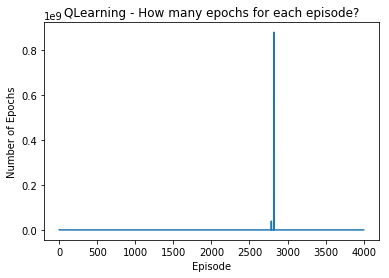

In [120]:
win = np.where(overEpisodes==10)[0].size
lose = np.where(overEpisodes==-10)[0].size
plt.title("QLearning - How many episode to converge to optimal solution?")
plt.ylabel("Number of episodes")
plt.plot(np.arange(1,nEpisodes+1), epochesCount)
plt.title("QLearning - How many epochs for each episode?")
plt.xlabel("Episode")
plt.ylabel("Number of Epochs")

In [155]:
for i in range(mz.shape[0]):
    for j in range(mz.shape[1]):
        if not gridWorld[i,j] == 0 :
            print("-", end="   ")
        elif start == tuple((i,j)):
            print("s", end="   ")
        else:
            print( actions[np.argmax(Q[i,j])][0], end="   ")
    #print()

-   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   w   n   e   e   e   e   n   w   w   w   w   w   w   w   w   w   w   w   w   -   -   w   -   -   -   -   -   n   -   -   -   n   -   -   -   -   -   -   -   n   -   -   w   -   s   w   n   -   n   w   e   -   n   -   w   n   n   s   e   e   n   -   -   e   -   -   -   w   -   -   -   e   -   n   -   -   -   e   -   -   -   n   -   -   s   n   e   -   n   s   e   -   e   -   n   w   w   -   s   n   e   -   n   -   -   s   -   s   -   n   -   s   -   -   -   n   -   n   -   -   -   -   -   n   -   -   n   -   w   -   w   -   s   n   s   n   n   -   n   w   w   -   e   e   n   -   -   e   -   -   -   e   -   -   -   -   -   s   -   n   -   -   -   s   -   n   -   -   w   w   e   n   s   s   s   -   e   -   w   -   n   -   w   s   w   -   n   -   -   w   -   -   -   -   -   -   -   e   -   w   -   n   -   e   -   -   -   n   -   -   e   -   n   s   n   n   n   -   n   s   s   -   n   -   s   e   s   -   

In [156]:
for i in range(mz.shape[0]):
    for j in range(mz.shape[1]):
            print( gridWorld[i,j], end="   ")
    print()

nan   nan   nan   nan   nan   nan   nan   10.0   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
nan   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   nan   
nan   0.0   nan   nan   nan   nan   nan   0.0   nan   nan   nan   0.0   nan   nan   nan   nan   nan   nan   nan   0.0   nan   
nan   0.0   nan   0.0   0.0   0.0   nan   0.0   0.0   0.0   nan   0.0   nan   0.0   0.0   0.0   0.0   0.0   0.0   0.0   nan   
nan   0.0   nan   nan   nan   0.0   nan   nan   nan   0.0   nan   0.0   nan   nan   nan   0.0   nan   nan   nan   0.0   nan   
nan   0.0   0.0   0.0   nan   0.0   0.0   0.0   nan   0.0   nan   0.0   0.0   0.0   nan   0.0   0.0   0.0   nan   0.0   nan   
nan   0.0   nan   0.0   nan   0.0   nan   0.0   nan   nan   nan   0.0   nan   0.0   nan   nan   nan   nan   nan   0.0   nan   
nan   0.0   nan   0.0   nan   0.0   nan   0.0   0.0   0.0   0.0   0.0   nan   0.0   0.0   0.0   nan   0.0   0.